Q1

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv(r"C:\Users\itanm\OneDrive\Enjoy sports.csv")

In [2]:
# Display the first few rows to understand the structure
print(data.head())

   Day   Outlook Temp. Humidity    Wind Decision
0    1     Sunny   Hot     High    Weak       No
1    2     Sunny   Hot     High  Strong       No
2    3  Overcast   Hot     High    Weak      Yes
3    4      Rain  Mild     High    Weak      Yes
4    5      Rain  Cool   Normal    Weak      Yes


In [3]:
# Dropping the 'Day' column as it doesn't contribute to the decision process
data = data.drop(['Day'], axis=1)

In [4]:
# Convert 'Decision' column to binary for easy handling (if it's not already)
data['Decision'] = data['Decision'].map({'No': 0, 'Yes': 1})

In [5]:
# Function to calculate entropy
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_value = np.sum([(-counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(elements))])
    return entropy_value


In [6]:
# Function to calculate Information Gain
def InfoGain(data, split_attribute_name, target_name="Decision"):
    total_entropy = entropy(data[target_name])
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(data.where(data[split_attribute_name] == vals[i]).dropna()[target_name]) for i in range(len(vals))])
    Information_Gain = total_entropy - weighted_entropy
    return Information_Gain


In [7]:
# ID3 Algorithm to build the Decision Tree
def ID3(data, originaldata, features, target_attribute_name="Decision", parent_node_class=None):
    # If all target_values have the same value, return that value
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]

    # If the dataset is empty, return the mode target feature value from the original dataset
    elif len(data) == 0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name], return_counts=True)[1])]
    
    # If there are no more features, return the parent node class
    elif len(features) == 0:
        return parent_node_class
# Otherwise, create the tree
    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]
        item_values = [InfoGain(data, feature, target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        tree = {best_feature: {}}
        
        features = [i for i in features if i != best_feature]
        
        for value in np.unique(data[best_feature]):
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = ID3(sub_data, data, features, target_attribute_name, parent_node_class)
            tree[best_feature][value] = subtree
        
        return tree

In [8]:
# Featurs to build the tree
features = data.columns.tolist()
features.remove('Decision')

In [9]:
# Build the decision tree using the ID3 algorithm
decision_tree = ID3(data, data, features, 'Decision')

In [10]:
# Print the decision tree
print("Decision Tree:")
print(decision_tree)

Decision Tree:
{'Outlook': {'Overcast': 1.0, 'Rain': {'Wind': {'Strong': 0.0, 'Weak': 1.0}}, 'Sunny': {'Humidity': {'High': 0.0, 'Normal': 1.0}}}}


Q2

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [12]:
# Load the dataset
data = pd.read_csv(r"C:\Users\itanm\OneDrive\Enjoy sports.csv")

In [13]:
# Dropping the 'Day' column as it doesn't contribute to the decision process
data = data.drop(['Day'], axis=1)

In [14]:
# Apply Label Encoding for categorical variables
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [15]:
# Display the dataset after encoding
print("Label Encoded Data:\n", data.head())

Label Encoded Data:
    Outlook  Temp.  Humidity  Wind  Decision
0        2      1         0     1         0
1        2      1         0     0         0
2        0      1         0     1         1
3        1      2         0     1         1
4        1      0         1     1         1


In [16]:
# Create the Decision Tree Classifier
X = data.drop('Decision', axis=1)  # Features (independent variables)
y = data['Decision']  # Target (dependent variable)

In [17]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy')

In [18]:
# Train the model
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

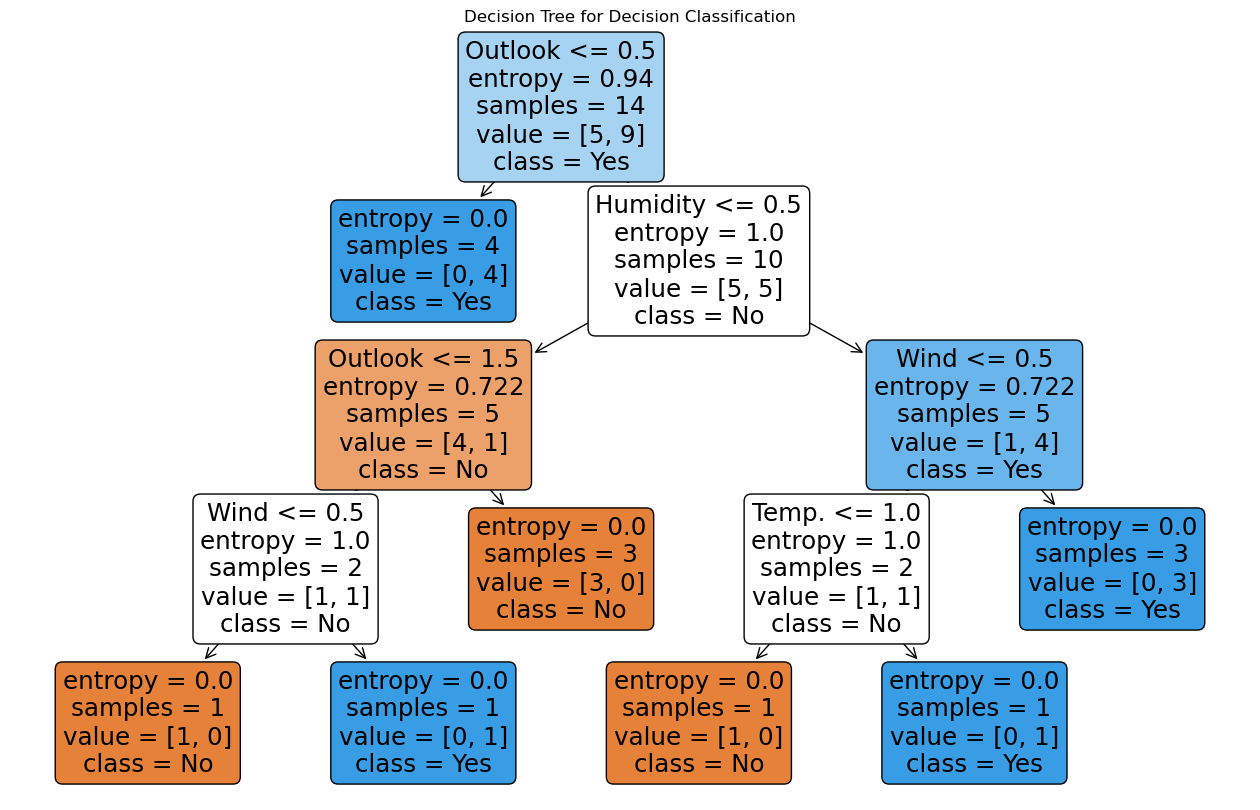

In [19]:
# Visualize the Decision Tree
plt.figure(figsize=(16,10))
tree.plot_tree(clf, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree for Decision Classification")
plt.show()

Q3

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the dataset
data = pd.read_csv(r"C:\Users\itanm\OneDrive\iris.csv")

In [22]:
# Splitting features and target
X = data.drop('Species', axis=1)  # Features
y = data['Species']  # Target (species)

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy')  # Using 'entropy' criterion
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
# Predict on test set
y_pred = clf.predict(X_test)

In [26]:
# Manually calculate the confusion matrix
def calculate_confusion_matrix(y_true, y_pred, classes):
    # Initialize confusion matrix
    conf_matrix = np.zeros((len(classes), len(classes)), dtype=int)
    class_to_index = {cls: idx for idx, cls in enumerate(classes)}
    
    for true_label, pred_label in zip(y_true, y_pred):
        true_index = class_to_index[true_label]
        pred_index = class_to_index[pred_label]
        conf_matrix[true_index, pred_index] += 1
    
    return conf_matrix

In [27]:
# Get unique classes
classes = np.unique(y_test)

In [28]:
# Calculate confusion matrix
conf_matrix = calculate_confusion_matrix(y_test, y_pred, classes)

In [29]:
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [30]:
# Manually calculate accuracy
def calculate_accuracy(conf_matrix):
    correct_predictions = np.trace(conf_matrix)  # Sum of diagonal elements (TP and TN)
    total_predictions = np.sum(conf_matrix)  # Sum of all elements
    accuracy = correct_predictions / total_predictions
    return accuracy

In [31]:
# Calculate accuracy
accuracy = calculate_accuracy(conf_matrix)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


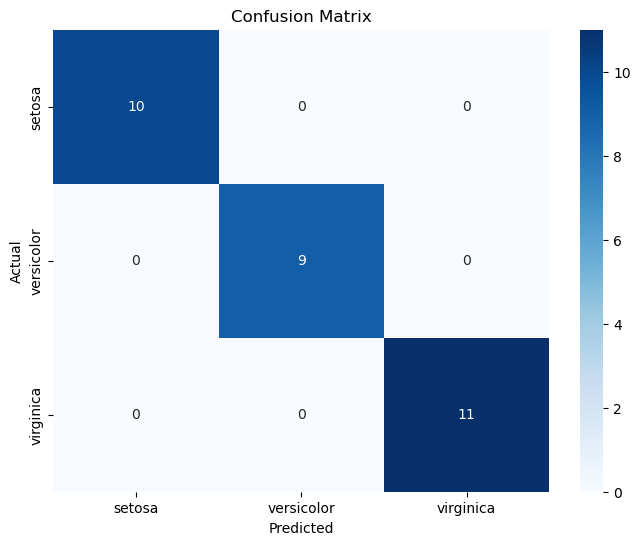

In [32]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Q4

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Load the dataset
data = pd.read_csv(r"C:\Users\itanm\OneDrive\iris.csv")

In [35]:
print(data.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Features (all columns except 'species')
X = data.drop(columns=['Species'])

In [38]:
# Target (the 'species' column)
y = data['Species']

In [39]:
# Split the dataset (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
print("Training set size:",X_train.shape)
print("Test set size:",X_test.shape)

Training set size: (120, 4)
Test set size: (30, 4)


In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [43]:
# Train the model on the training data
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Make predictions manually
y_pred = rf_model.predict(X_test)

In [45]:
# Initialize confusion matrix (for 3 classes in Iris dataset)
classes = np.unique(y_test)  # ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
conf_matrix = np.zeros((len(classes), len(classes)), dtype=int)

In [46]:
# Manually build the confusion matrix
for true_label, pred_label in zip(y_test, y_pred):
    true_index = np.where(classes == true_label)[0][0]
    pred_index = np.where(classes == pred_label)[0][0]
    conf_matrix[true_index, pred_index] += 1

In [47]:
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [48]:
# Calculate accuracy manually
correct_predictions = np.trace(conf_matrix)  # Sum of diagonal elements (correct predictions)
total_predictions = np.sum(conf_matrix)  # Total number of predictions
accuracy = correct_predictions / total_predictions

In [49]:
print(f"Accuracy Calculation: {accuracy * 100:.2f}%")

Accuracy Calculation: 100.00%


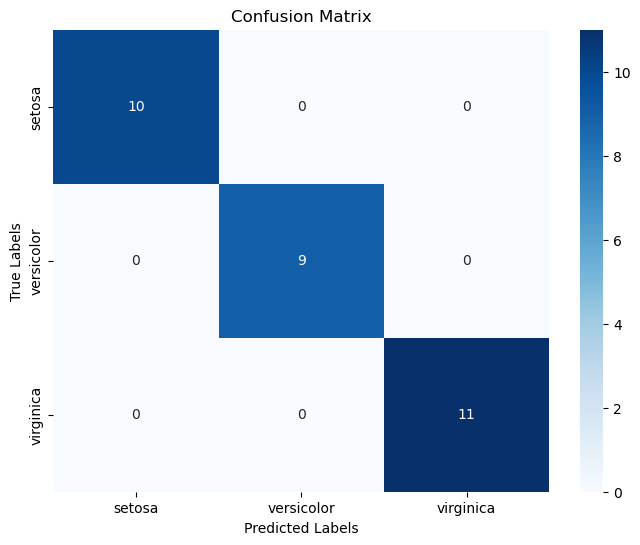

In [111]:
# Plot the Confusion Matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()